In [1]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from metadata import const

In [2]:
df = pd.read_csv('dataset/clean-sample-200000.csv')
df = shuffle(df)

In [3]:
zero_df = df.loc[df[const.class_label] == 0]
one_df = df.loc[df[const.class_label] == 1]

print("class zero = ", len(zero_df.index))
print("class one = ", len(one_df.index))

class zero =  87362
class one =  82460


In [4]:
features = [f for f in df.columns if f != const.class_label]
labels = ['benign', 'attack']
x = df[features]
y = df[const.class_label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
clf = tree.DecisionTreeRegressor(min_samples_split=20, random_state=0)
clf.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=20, random_state=0)

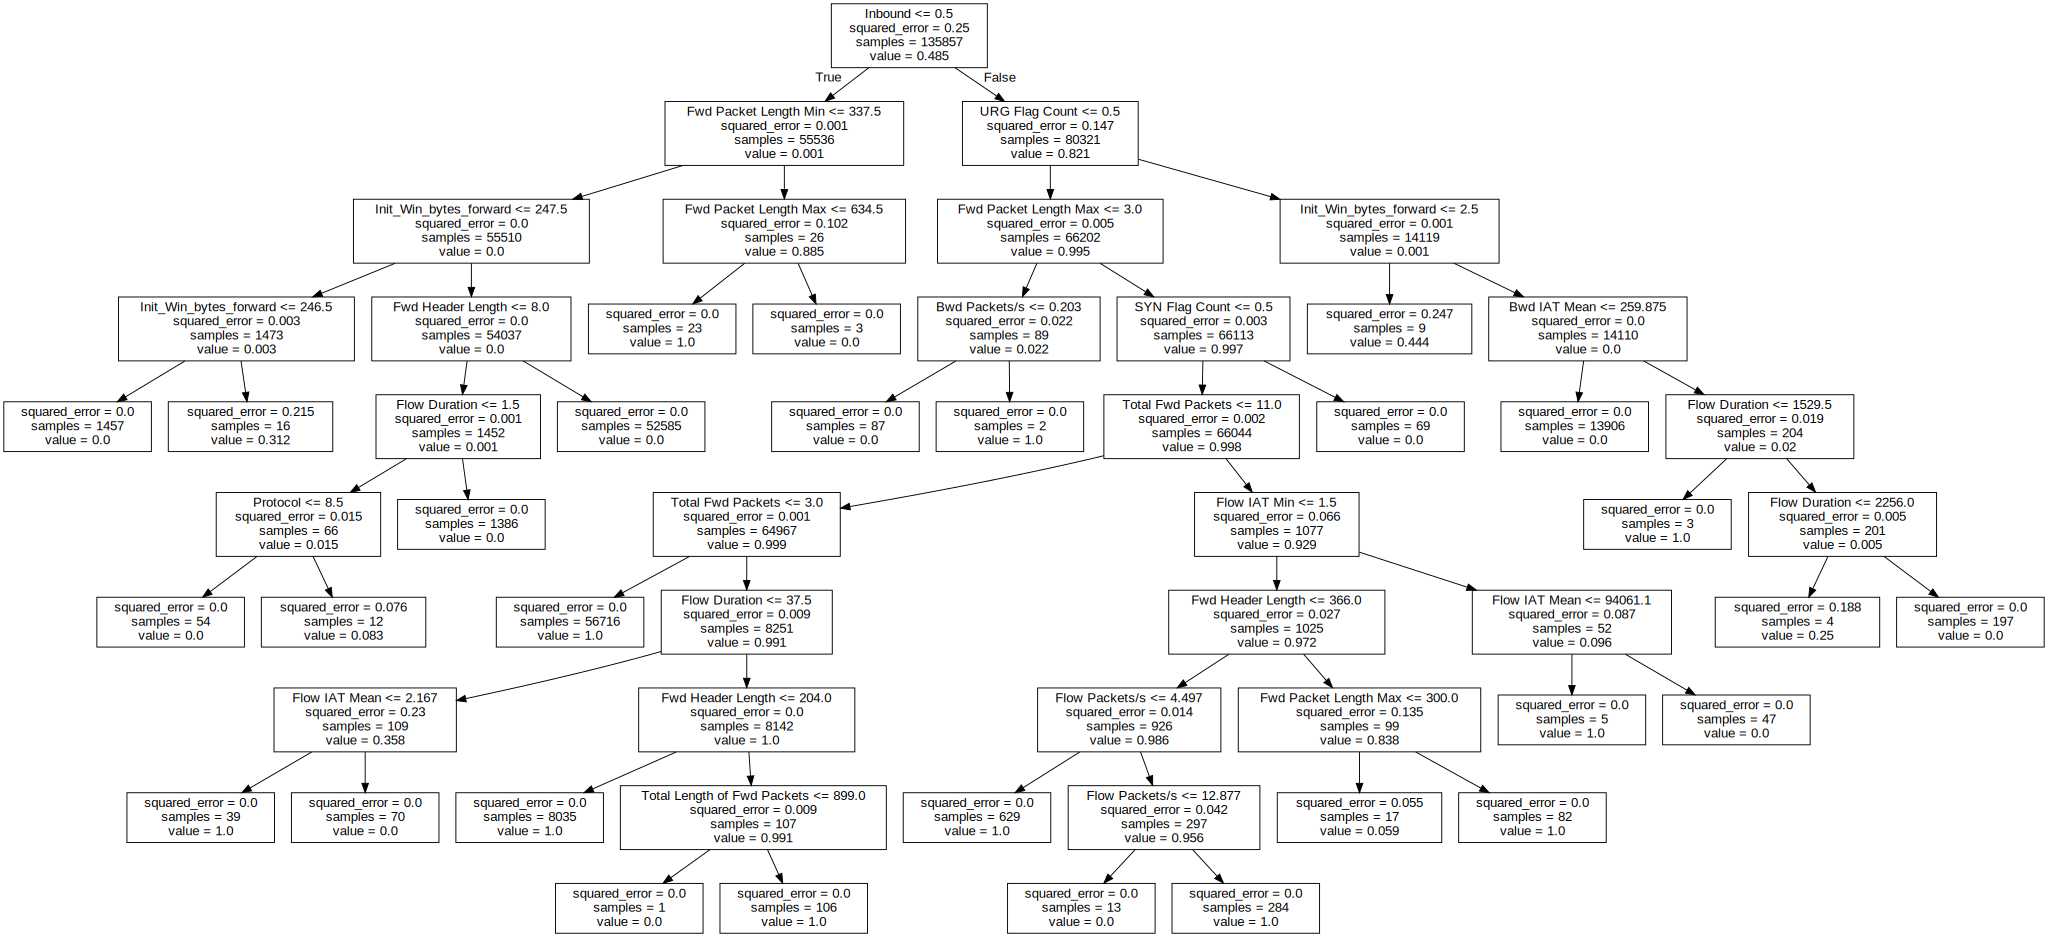

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features, class_names=['benign', 'attack'])
graph = graphviz.Source(dot_data)
graph.render(filename='decision-tree')
graph

In [7]:
score = clf.score(x_test, y_test)
print(score)

0.9997612110812792


In [8]:
cm = confusion_matrix(y_test, clf.predict(x_test).astype('int32'))
print(cm)

[[17441     0]
 [    2 16522]]


In [9]:
precision_recall_fscore_support(y_test, clf.predict(x_test).astype('int32'), average='micro')

(0.9999411158545561, 0.9999411158545561, 0.9999411158545561, None)

In [10]:
print(clf.get_depth())

9


In [11]:
top_features = []
for i in range(len(clf.feature_importances_)):
    top_features.append((clf.feature_importances_[i], x.columns[i]))
top_features.sort(reverse=True)
for f in top_features:
    print(f[1], "\t\t\t", f[0])

 Inbound 			 0.6507755592579375
 URG Flag Count 			 0.3394879979972297
 Fwd Packet Length Max 			 0.0029325126953957466
 SYN Flag Count 			 0.002022636110229287
 Flow Duration 			 0.0014009391490498254
 Flow IAT Min 			 0.0011182385646836053
 Flow IAT Mean 			 0.0008714390123281434
 Fwd Packet Length Min 			 0.0005992808914463437
 Flow Packets/s 			 0.00037779895739501807
 Total Fwd Packets 			 0.00016644120338079997
Init_Win_bytes_forward 			 9.833679339922704e-05
 Fwd Header Length 			 5.7705756387344405e-05
 Bwd Packets/s 			 5.7625784866169904e-05
Total Length of Fwd Packets 			 2.9199788077529795e-05
 Bwd IAT Mean 			 2.278361527150858e-06
 Protocol 			 2.0096766665709767e-06
Fwd PSH Flags 			 0.0
Bwd Packet Length Max 			 0.0
Active Mean 			 0.0
 RST Flag Count 			 0.0
 Init_Win_bytes_backward 			 0.0
 Idle Std 			 0.0
 Fwd Packet Length Std 			 0.0
 Down/Up Ratio 			 0.0
 CWE Flag Count 			 0.0
 Bwd Packet Length Min 			 0.0
 Bwd IAT Min 			 0.0
 Bwd Header Length 			 0.0
 Activ